In [120]:
# Imports
import numpy as np
import random
import gymnasium as gym
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pygame
import matplotlib.pyplot as plt

In [121]:
def state_index(state):
    cart, cart_vel, pole, pole_vel = state

    for index_0, row in enumerate(cart_position):
        if(cart < row[1] ):
            break

    for index_1, row in enumerate(cart_velocity):
        if(cart_vel < row[1] ):
            break
    
    for index_2, row in enumerate(pole_angle):
        if(pole < row[1] ):
            break

    for index_3, row in enumerate(pole_velocity):
        if(pole_vel < row[1] ):
            break

    return (index_0,index_1,index_2,index_3)



In [122]:
# Function for epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon=0.05):
    # state is pre discretized
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Random action
    else:
        return np.argmax(Q_table[state])  # Greedy action

In [123]:
def update_rule(state,action,reward,next_state):
    # Q(s,a)←Q(s,a)+α(r+γmax a′​Q(s′,a ′)−Q(s,a))
    Q_curr = Q_table[state][action] # Q(s,a)
    Q_max = np.max(Q_table[next_state]) # max (a') : Q(s',a')

    # Update
    Q_table[state][action] = Q_curr + alpha * ( reward + gamma*Q_max - Q_curr )

In [124]:
def display_Q_table(Q_table):
    print("Q-table:")
    for state, q_values in Q_table.items():
        print(f"State: {state}, Q-values: {q_values}")

In [125]:
cart_position = [
    (-2.4, -2.0),   # 0
    (-2.0, -1.6),   # 1
    (-1.6, -1.2),   # 2
    (-1.2, -0.8),   # 3
    (-0.8, -0.4),   # 4
    (-0.4, 0),      # 5
    (0, 0.4),       # 6
    (0.4, 0.8),     # 7
    (0.8, 1.2),     # 8
    (1.2, 1.6),     # 9
    (1.6, 2.0),     # 10
    (2.0, 2.4)      # 11
]

cart_velocity = [
    (-3.0, -2.5),   # 0
    (-2.5, -2.0),   # 1
    (-2.0, -1.5),   # 2
    (-1.5, -1.0),   # 3
    (-1.0, -0.5),   # 4
    (-0.5, 0.0),    # 5
    (0.0, 0.5),     # 6
    (0.5, 1.0),     # 7
    (1.0, 1.5),     # 8
    (1.5, 2.0),     # 9
    (2.0, 2.5),     # 10
    (2.5, 3.0)      # 11
]

pole_angle = [
    (-0.24, -0.2),    # 0
    (-0.2, -0.16),     # 1
    (-0.16, -0.12),    # 2
    (-0.12, -0.08),    # 3
    (-0.08, -0.04),    # 4
    (-0.04, 0),        # 5
    (0, 0.04),         # 6
    (0.04, 0.08),      # 7
    (0.08, 0.12),      # 8
    (0.12, 0.16),      # 9
    (0.16, 0.2),       # 10
    (0.2, 0.24)        # 11
]

pole_velocity = [
    (-2.0, -1.6),   # 0
    (-1.6, -1.2),   # 1
    (-1.2, -0.8),   # 2
    (-0.8, -0.4),   # 3
    (-0.4, 0.0),    # 4
    (0.0, 0.4),     # 5
    (0.4, 0.8),     # 6
    (0.8, 1.2),     # 7
    (1.2, 1.6),     # 8
    (1.6, 2.0),     # 9
]

# state = (-0.2, 0.2, 1, 1)
# print(state_index(state))


In [126]:
# Parameters
epsilon = 0.05
alpha = 0.1
gamma = 0.9

In [165]:
# Create the CartPole environment
# env = gym.make('CartPole-v1', render_mode = 'human')
env = gym.make('CartPole-v1')

# Initialize Q-table with zeros
num_actions = env.action_space.n

# Initialize the Q_table
Q_table = {}
Q_tabl_best = {}
max = 0

# Generate all possible combinations of two numbers ranging from 0 to 6
for i in range( len(cart_position) ):
    for j in range( len(cart_velocity) ):
        for m in range( len(pole_angle) ):
             for n in range( len(pole_velocity) ):
                key = (i, j, m, n)
                value = np.zeros(num_actions)
                Q_table[key] = value

In [166]:
# Training loop
episode_rewards = []
training_curve = []
num_episodes = 5000
for episode in range(num_episodes):
    state = env.reset()
    state = state[0]
    state = state_index(state)
    cart_old = abs(state[0])
    cartV_old = abs(next_state[1])
    pole_old = abs(state[2])
    poleV_old = abs(next_state[3])

    terminated = False
    total_reward = 0

    while not terminated:
        action = epsilon_greedy_policy(state, epsilon)

        # error = abs(next_state)
        next_state, reward, terminated, _, _ = env.step(action)
        
        cart_new = abs(next_state[0])
        cartV_new = abs(next_state[1])
        pole_new = abs(next_state[2])
        poleV_new = abs(next_state[3])
        
        # delta = reward
        # delta = 2*(pole_old - pole_new)/4 + 1*(cart_old - cart_new)/4  + 3*(cartV_old - cartV_new)/3 + 6*(poleV_old - poleV_new)/3
        delta = 20*(pole_old - pole_new) + (cart_old - cart_new)
        # delta = (pole_old - pole_new)
        
        pole_old = pole_new
        cart_old = cart_new
        cartV_old = cartV_new
        poleV_old = poleV_new

        # delta = reward

        next_state = state_index(next_state)

        
        update_rule(state,action,delta,next_state)


        total_reward += reward
        state = next_state

    episode_rewards.append(total_reward)

    if episode % 25 == 0:
        mean = np.mean(episode_rewards[-25:])
        print(f"Episode {episode}: Average Reward = {mean:.2f}")
        training_curve.append(mean)

Episode 0: Average Reward = 10.00
Episode 25: Average Reward = 50.72
Episode 50: Average Reward = 100.40
Episode 75: Average Reward = 106.72
Episode 100: Average Reward = 98.76
Episode 125: Average Reward = 97.28
Episode 150: Average Reward = 89.00
Episode 175: Average Reward = 100.76
Episode 200: Average Reward = 123.40
Episode 225: Average Reward = 129.84
Episode 250: Average Reward = 146.84
Episode 275: Average Reward = 144.32
Episode 300: Average Reward = 133.72
Episode 325: Average Reward = 135.40
Episode 350: Average Reward = 148.48
Episode 375: Average Reward = 162.96
Episode 400: Average Reward = 161.32
Episode 425: Average Reward = 128.48
Episode 450: Average Reward = 171.80
Episode 475: Average Reward = 163.28
Episode 500: Average Reward = 217.72
Episode 525: Average Reward = 186.60
Episode 550: Average Reward = 200.36
Episode 575: Average Reward = 144.64
Episode 600: Average Reward = 198.04
Episode 625: Average Reward = 243.36
Episode 650: Average Reward = 195.40
Episode 675

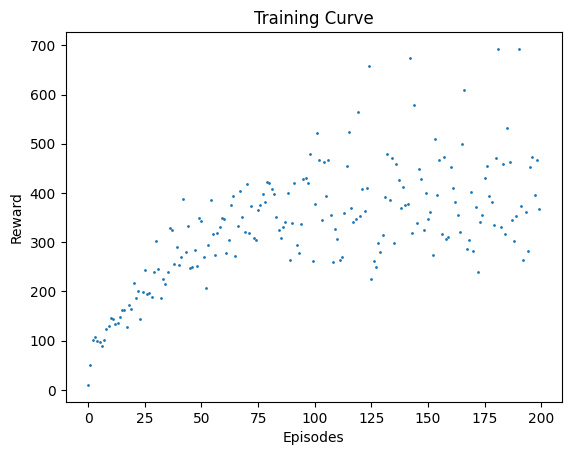

In [167]:
# Plot the Training Curve
indices = range(len(training_curve))
plt.scatter(indices, training_curve, s=1)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training Curve')
# plt.grid()
plt.show()

In [168]:
# Initialize dictionary for optimal policy
optimal_policy = {}

# Calculate optimal Policy
for state, q_values in Q_table.items():
    # Find the action index with the maximum Q-value
    optimal_action = np.argmax(q_values)

    # Store the optimal action for the state
    optimal_policy[state] = optimal_action

# Print the optimal policy
print("Optimal Policy:")
for state, action in optimal_policy.items():
    print(f"State: {state}, Optimal Action: {action}")

Optimal Policy:
State: (0, 0, 0, 0), Optimal Action: 0
State: (0, 0, 0, 1), Optimal Action: 0
State: (0, 0, 0, 2), Optimal Action: 0
State: (0, 0, 0, 3), Optimal Action: 0
State: (0, 0, 0, 4), Optimal Action: 0
State: (0, 0, 0, 5), Optimal Action: 0
State: (0, 0, 0, 6), Optimal Action: 0
State: (0, 0, 0, 7), Optimal Action: 0
State: (0, 0, 0, 8), Optimal Action: 0
State: (0, 0, 0, 9), Optimal Action: 0
State: (0, 0, 1, 0), Optimal Action: 0
State: (0, 0, 1, 1), Optimal Action: 0
State: (0, 0, 1, 2), Optimal Action: 0
State: (0, 0, 1, 3), Optimal Action: 0
State: (0, 0, 1, 4), Optimal Action: 0
State: (0, 0, 1, 5), Optimal Action: 0
State: (0, 0, 1, 6), Optimal Action: 0
State: (0, 0, 1, 7), Optimal Action: 0
State: (0, 0, 1, 8), Optimal Action: 0
State: (0, 0, 1, 9), Optimal Action: 0
State: (0, 0, 2, 0), Optimal Action: 0
State: (0, 0, 2, 1), Optimal Action: 0
State: (0, 0, 2, 2), Optimal Action: 0
State: (0, 0, 2, 3), Optimal Action: 0
State: (0, 0, 2, 4), Optimal Action: 0
State: (0

In [156]:
display_Q_table(Q_table)

Q-table:
State: (0, 0, 0, 0), Q-values: [0. 0.]
State: (0, 0, 0, 1), Q-values: [0. 0.]
State: (0, 0, 0, 2), Q-values: [0. 0.]
State: (0, 0, 0, 3), Q-values: [0. 0.]
State: (0, 0, 0, 4), Q-values: [0. 0.]
State: (0, 0, 0, 5), Q-values: [0. 0.]
State: (0, 0, 0, 6), Q-values: [0. 0.]
State: (0, 0, 0, 7), Q-values: [0. 0.]
State: (0, 0, 0, 8), Q-values: [0. 0.]
State: (0, 0, 0, 9), Q-values: [0. 0.]
State: (0, 0, 1, 0), Q-values: [0. 0.]
State: (0, 0, 1, 1), Q-values: [0. 0.]
State: (0, 0, 1, 2), Q-values: [0. 0.]
State: (0, 0, 1, 3), Q-values: [0. 0.]
State: (0, 0, 1, 4), Q-values: [0. 0.]
State: (0, 0, 1, 5), Q-values: [0. 0.]
State: (0, 0, 1, 6), Q-values: [0. 0.]
State: (0, 0, 1, 7), Q-values: [0. 0.]
State: (0, 0, 1, 8), Q-values: [0. 0.]
State: (0, 0, 1, 9), Q-values: [0. 0.]
State: (0, 0, 2, 0), Q-values: [0. 0.]
State: (0, 0, 2, 1), Q-values: [0. 0.]
State: (0, 0, 2, 2), Q-values: [0. 0.]
State: (0, 0, 2, 3), Q-values: [0. 0.]
State: (0, 0, 2, 4), Q-values: [0. 0.]
State: (0, 0, 2,

In [169]:
episodes = 5
env = gym.make('CartPole-v1', render_mode = 'human')
# env = gym.make('CartPole-v1')

num_actions = env.action_space.n

for episode in range(0, episodes):
    state = env.reset()
    state = state[0]
    state = state_index(state)
    terminated = False
    score = 0

    while not terminated :
        action = optimal_policy[state]
        state, reward, terminated , truncated, info  = env.step(action)
        state = state_index(state)
        score += reward
    
    print(score)


# Close the Pygame window
pygame.quit()

321.0
2443.0
273.0
654.0
1224.0
